# Analysis of Baby Naming Trends in the US (1880-2023)

## Task
1. Analyzing baby name trends based on data from the official U.S. Social Security website.
2. Querying the usage frequency and trend of a single name.
3. Defining a function to query and visualize the Top 10 names over the years, studying their popularity.
4. Querying and visualizing the Top 10 unisex names.

In [1]:
import zipfile

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
# Download the data
# Data Source: https://www.ssa.gov/OACT/babynames/limits.html
file_url = "https://www.ssa.gov/OACT/babynames/names.zip"
response = requests.get(file_url)

# Save the zip file into source folder
zip_file_path = "./source/names.zip"
with open(zip_file_path, 'wb') as f:
    f.write(response.content)
    f.close()

In [7]:
# Unzip the data
import zipfile
zip_ref = zipfile.ZipFile(zip_file_path, 'r')
zip_ref.extractall("./source/") #extract file
zip_ref.close()

In [2]:
# Load data from 1880-2023
all_years_df = pd.concat(pd.read_csv(f"source/yob{year}.txt",names=["name", "gender", "count_number"]).assign(year=year) for year in range(1880,2023)) 

all_years_df.head()

,name,gender,count_number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [3]:
all_years_df.to_csv("all_years_df.csv")

In [3]:
all_years_df = pd.read_csv("all_years_df.csv")

In [4]:
# Check data integrity
all_years_df.count()

Unnamed: 0      2085537
name            2085537
gender          2085537
count_number    2085537
year            2085537
dtype: int64

In [5]:
year_min = all_years_df["year"].min()
year_max = all_years_df["year"].max()
print(year_max, year_min)

2022 1880


In [6]:
# Reset index
sorted_df = all_years_df.set_index(['gender', 'name', 'year']).sort_index()
sorted_df.head()

Unnamed: 0  count_number
gender name  year                          
F      Aabha 2011       13343             7
             2012       16858             5
             2014       10950             9
             2015       13000             7
             2016       12870             7

## Step 1: Using Grace as an example, analyze the trend of a single name.

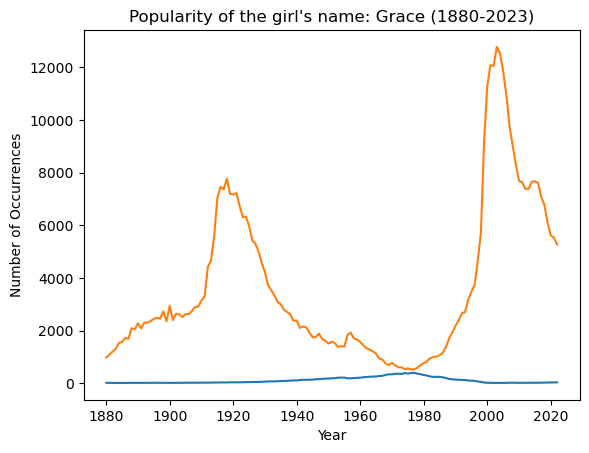

<Figure size 640x480 with 0 Axes>

In [7]:
# Draw the line chart
plt.plot(sorted_df.loc[('F', 'Grace')])
plt.title("Popularity of the girl's name: Grace (1880-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.show()

# Save the fig
plt.savefig("output/Popularity of Grace.png")

In [8]:
# Find the peak year and count numbers
grace_df = sorted_df.loc[('F', 'Grace')]
grace_df.sort_values(by='count_number', ascending=False)

,Unnamed: 0,count_number
year,,
2003,12,12781
2004,12,12536
2001,15,12089
2002,14,12056
2005,13,11865
...,...,...
1978,361,587
1975,365,567
1974,389,535


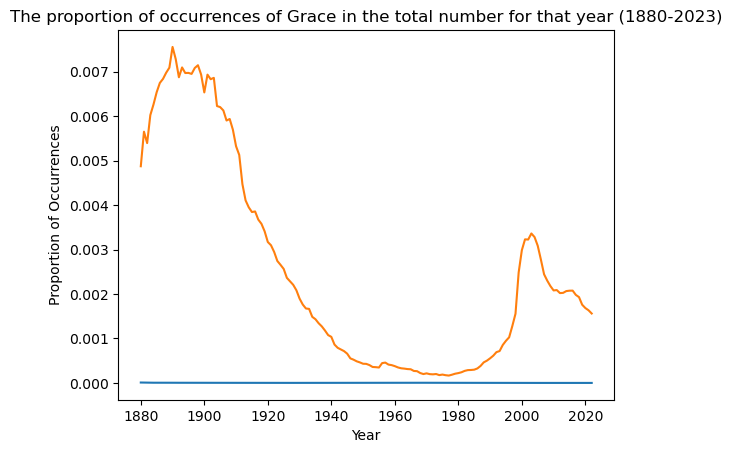

<Figure size 640x480 with 0 Axes>

In [9]:
# The proportion of occurrences of Grace in the total number for that year (1880-2023)
plt.plot(sorted_df.loc[('F', 'Grace')] / sorted_df.groupby('year').sum())
plt.title("The proportion of occurrences of Grace in the total number for that year (1880-2023)")
plt.xlabel("Year")
plt.ylabel("Proportion of Occurrences")
plt.show()

# Save the figure
plt.savefig("output/Proportion of Occurrences of Grace.png")

### Analysis and Observation

1. Peak Periods: The name "Grace" experienced significant peaks in the early 1900s and early 2000s.
2. Low Periods: Between the 1920s and 1980s, the frequency of using the name "Grace" was relatively low.
3. Modern Trends: Although the use of "Grace" reached a peak in the early 21st century, its popularity has declined somewhat in recent years but remains at a relatively high level.
4. Popularity Cycles: The popularity of the name "Grace" is cyclical, with notable fluctuations in usage frequency and popularity during different historical periods.

## Step 2: Define the plotting function to compare naming trends of common names

In [53]:
# Define the plotting function to draw the plot chart
def plot_name_trends(gender, name):
    selected_df = sorted_df.loc[(gender, name)]
    plt.plot(selected_df.index.get_level_values('year'), selected_df.values, label=name)
    plt.axis(xmin=1880, xmax=2023)

In [56]:
# Define the plotting function to compare naming trends of common names
def compare_name_trends(gender, names):
    plt.figure(figsize=(12, 6))
    for name in names:
        plot_name_trends(gender, name)
        
    plt.legend()
    plt.title("The trends of Selected names")
    plt.show()

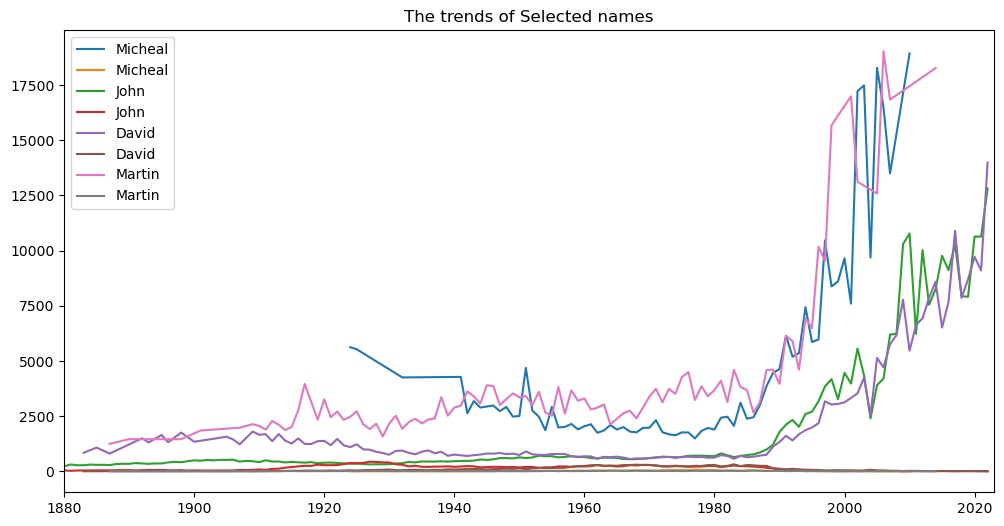

<Figure size 640x480 with 0 Axes>

In [57]:
genders = ["F", "M"]
names_lst = ['Micheal', 'John', 'David', 'Martin']
compare_name_trends(genders[0], names_lst)

# Save the figure
plt.savefig("output/Trends of Selected male baby names.png")

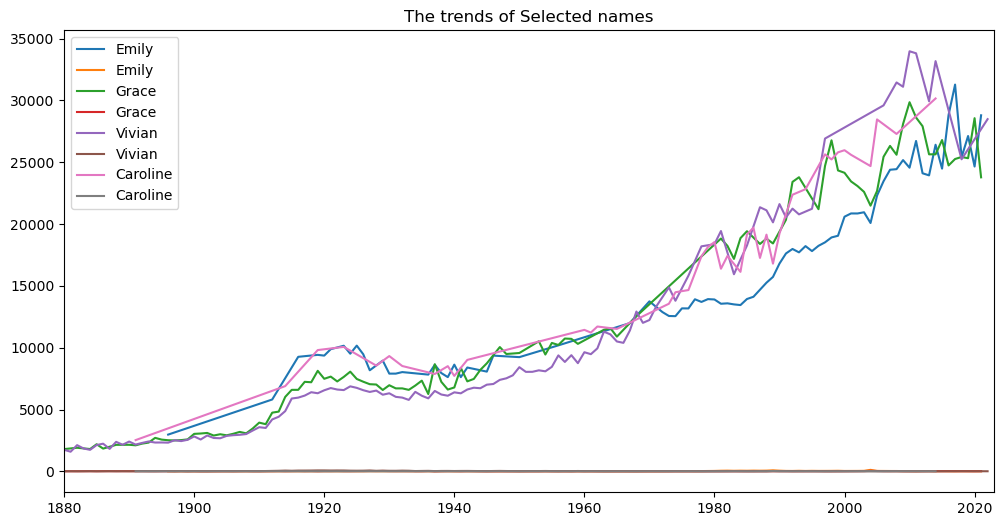

In [14]:
names_lst = ['Emily', 'Grace', 'Vivian', 'Caroline']
compare_name_trends(genders[1], names_lst)

# Save the figure
plt.savefig("output/Trends of Selected female baby names.png")

### Analysis and Observation

1. Male Name Trends:

    - Michael and John were very popular in the mid-20th century but saw a significant decline in usage after the 1970s.
    - David also peaked in the mid-20th century, but its decline was relatively smaller.
    - Martin's usage frequency has been relatively low and stable, with no significant peak periods.

2. Female Name Trends:

    - Emily and Grace were very popular at the end of the 20th century but have seen a decrease in usage after 2000.
    - Vivian and Caroline had lower usage frequencies but experienced certain peaks at the beginning and end of the 20th century.

## Step 3: Top 10 boby names by year  

In [16]:
# Reset index by gender and year
yearly_df = all_years_df.set_index(['gender', 'year']).sort_index()
yearly_df.tail(10)

Unnamed: 0     name  count_number
gender year                                   
M      2022       32032     Zoah             5
       2022       32033   Zohair             5
       2022       32034    Zohar             5
       2022       32035  Zoraver             5
       2022       32036    Zorro             5
       2022       32037  Zoumana             5
       2022       32038   Zuberi             5
       2022       32039    Zylon             5
       2022       32040   Zymeer             5
       2022       32041  Zymeire             5

In [17]:
# Find the data with specific year and gender 
female_2022_df = yearly_df.loc['F',2022].sort_values('count_number', ascending=False)
female_2022_name = female_2022_df.head(10).reset_index().name
female_2022_name

0       Olivia
1         Emma
2    Charlotte
3       Amelia
4       Sophia
5     Isabella
6          Ava
7          Mia
8       Evelyn
9         Luna
Name: name, dtype: object

In [18]:
# Define a function to simplify this process
def get_yearly_name(gender, year):
    return(
        yearly_df.loc[gender, year]
        .sort_values(by='count_number', ascending=False)
        .head(10)
        .reset_index()
        .name)

In [19]:
last_10years_female_df = pd.DataFrame({year: get_yearly_name('F', year) for year in range(2013, 2023)})
last_10years_female_df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Sophia,Emma,Emma,Emma,Emma,Emma,Olivia,Olivia,Olivia,Olivia
1,Emma,Olivia,Olivia,Olivia,Olivia,Olivia,Emma,Emma,Emma,Emma
2,Olivia,Sophia,Sophia,Ava,Ava,Ava,Ava,Ava,Charlotte,Charlotte
3,Isabella,Isabella,Ava,Sophia,Isabella,Isabella,Sophia,Charlotte,Amelia,Amelia
4,Ava,Ava,Isabella,Isabella,Sophia,Sophia,Isabella,Sophia,Ava,Sophia
5,Mia,Mia,Mia,Mia,Mia,Charlotte,Charlotte,Amelia,Sophia,Isabella
6,Emily,Emily,Abigail,Charlotte,Charlotte,Mia,Amelia,Isabella,Isabella,Ava
7,Abigail,Abigail,Emily,Abigail,Amelia,Amelia,Mia,Mia,Mia,Mia
8,Madison,Madison,Charlotte,Emily,Evelyn,Harper,Harper,Evelyn,Evelyn,Evelyn
9,Elizabeth,Charlotte,Harper,Amelia,Abigail,Evelyn,Evelyn,Harper,Harper,Luna


In [20]:
last_10years_male_df = pd.DataFrame({year: get_yearly_name('M', year) for year in range(2013, 2023)})
last_10years_male_df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Noah,Noah,Noah,Noah,Liam,Liam,Liam,Liam,Liam,Liam
1,Jacob,Liam,Liam,Liam,Noah,Noah,Noah,Noah,Noah,Noah
2,Liam,Mason,Mason,William,William,William,Oliver,Oliver,Oliver,Oliver
3,Mason,Jacob,Jacob,Mason,James,James,William,Elijah,Elijah,James
4,William,William,William,James,Logan,Oliver,Elijah,William,James,Elijah
5,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin,James,James,William,William
6,Michael,Michael,James,Jacob,Mason,Elijah,Benjamin,Benjamin,Benjamin,Henry
7,Alexander,Alexander,Alexander,Michael,Elijah,Lucas,Lucas,Lucas,Lucas,Lucas
8,Jayden,James,Michael,Elijah,Jacob,Mason,Mason,Henry,Henry,Benjamin
9,Daniel,Daniel,Benjamin,Ethan,Oliver,Logan,Alexander,Alexander,Theodore,Theodore


In [21]:
# Define a function to draw the line chart
def top10_yearly_trends(gender, names):
    for name in names:
        df = all_years_df.query("gender == @gender and name == @name")
        plt.plot(df["year"], df["count_number"], label=name)

    plt.xlim(1880, 2023)
    plt.legend()
    plt.title(f"The trends of Top 10 {gender} baby's names")
    plt.xlabel("Year")
    plt.ylabel("Number of Occurrences")
    plt.show()

In [22]:
# Define a function to get top 10 baby's name
def top10_name(gender, year):
    # 示例函数，返回特定年份前10名的名字列表
    return all_years_df[(all_years_df['gender'] == gender) & (all_years_df['year'] == year)]['name'].value_counts().head(10).index.tolist()

In [23]:
# get top 10 female baby's name in 2022
top10_female_names_2022 = get_yearly_name('F', 2022)
top10_female_names_2022

0       Olivia
1         Emma
2    Charlotte
3       Amelia
4       Sophia
5     Isabella
6          Ava
7          Mia
8       Evelyn
9         Luna
Name: name, dtype: object

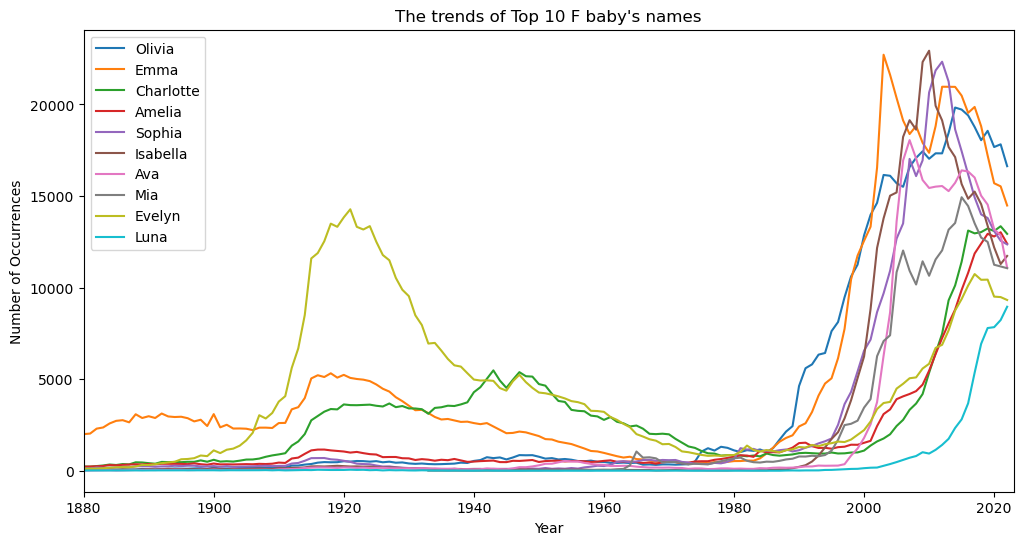

<Figure size 640x480 with 0 Axes>

In [24]:
# Call the function
# Draw the Female baby's names trends
plt.figure(figsize=(12, 6))
top10_yearly_trends('F', top10_female_names_2022)

# Save the figure
plt.savefig("output/Trends of Top 10 female baby names.png")

In [25]:
# Draw the Male baby's names trends
top10_male_names_2022 = get_yearly_name('M', 2022)
top10_male_names_2022

0        Liam
1        Noah
2      Oliver
3       James
4      Elijah
5     William
6       Henry
7       Lucas
8    Benjamin
9    Theodore
Name: name, dtype: object

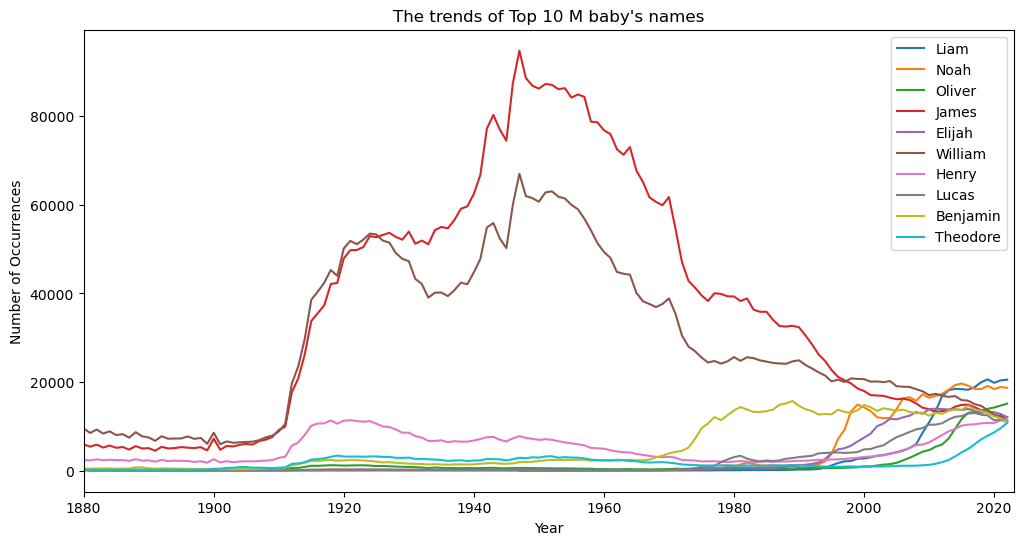

<Figure size 640x480 with 0 Axes>

In [26]:
# Call the function
# Draw the Male baby's names trends
plt.figure(figsize=(12, 6))
top10_yearly_trends('M', top10_male_names_2022)

# Save the figure
plt.savefig("output/Trends of Top 10 male baby names.png")

### Analysis and Observation

1. Female Name Trends:

    - Many names began to become significantly popular in the 2000s and 2010s, such as Olivia, Emma, Charlotte, Amelia, Sophia.
    - Most names peaked in the early 2020s, indicating these names are very popular recently.

2. Male Name Trends:

    - Some names like James and William were very popular in the mid-20th century, while names like Liam, Noah, Oliver have risen significantly in the 21st century.
    - Most names peaked in the early 2020s, indicating these names are very popular recently.

## Step 4: Find the top 10 unisex baby names

Notes: Unisex names: Those for which 0.5 < total number of boys/total number of girls < 2

In [28]:
total_names_counts = all_years_df.groupby(['gender', 'name'])['count_number'].sum()
total_names_counts.head(10)

gender  name     
F       Aabha         56
        Aabidah        5
        Aabriella     51
        Aada          13
        Aadaya         9
        Aaden          5
        Aadhini       31
        Aadhira      232
        Aadhirai       5
        Aadhvi         5
Name: count_number, dtype: int64

In [29]:
# count male baby's name number
male_counts = total_names_counts['M']
male_counts

name
Aaban     127
Aabid      16
Aabir      19
Aadam     333
Aadan     136
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: count_number, Length: 43678, dtype: int64

In [30]:
# count female baby's name number
female_counts = total_names_counts['F']
female_counts

name
Aabha        56
Aabidah       5
Aabriella    51
Aada         13
Aadaya        9
             ..
Zyrielle     32
Zyrihanna    50
Zyriyah      16
Zyva         47
Zyyanna       6
Name: count_number, Length: 70244, dtype: int64

In [31]:
# Calculate the ratio
ratios = (male_counts / female_counts).dropna()
ratios.head(10)

name
Aaden      1008.200000
Aadi         64.937500
Aadyn        36.437500
Aalijah       1.838926
Aaliyah       0.000993
Aaliyan       0.219512
Aamari        1.615385
Aamir       406.666667
Aaren         3.159574
Aareon        3.300000
Name: count_number, dtype: float64

In [33]:
# Find all unisex names
unixsex_names = ratios[(ratios > 0.5) & (ratios < 2.0)].index
unixsex_names

Index(['Aalijah', 'Aamari', 'Aari', 'Aaris', 'Aaryn', 'Aavyn', 'Abey', 'Abrar',
       'Abriel', 'Adair',
       ...
       'Zi', 'Zihan', 'Zikora', 'Zixuan', 'Ziyan', 'Zohar', 'Zyarie', 'Zyian',
       'Zyn', 'Zyrie'],
      dtype='object', name='name', length=1734)

In [34]:
# Find top 10 unisex names
top10_unixsex_names = (male_counts.loc[unixsex_names] + female_counts[unixsex_names]).sort_values(ascending=False).head(10)

top10_unixsex_names

name
Jessie     279899
Riley      228298
Casey      190819
Jackie     169745
Peyton     133940
Jaime      120055
Kendall     98480
Kerry       98455
Jody        87207
Quinn       79318
Name: count_number, dtype: int64

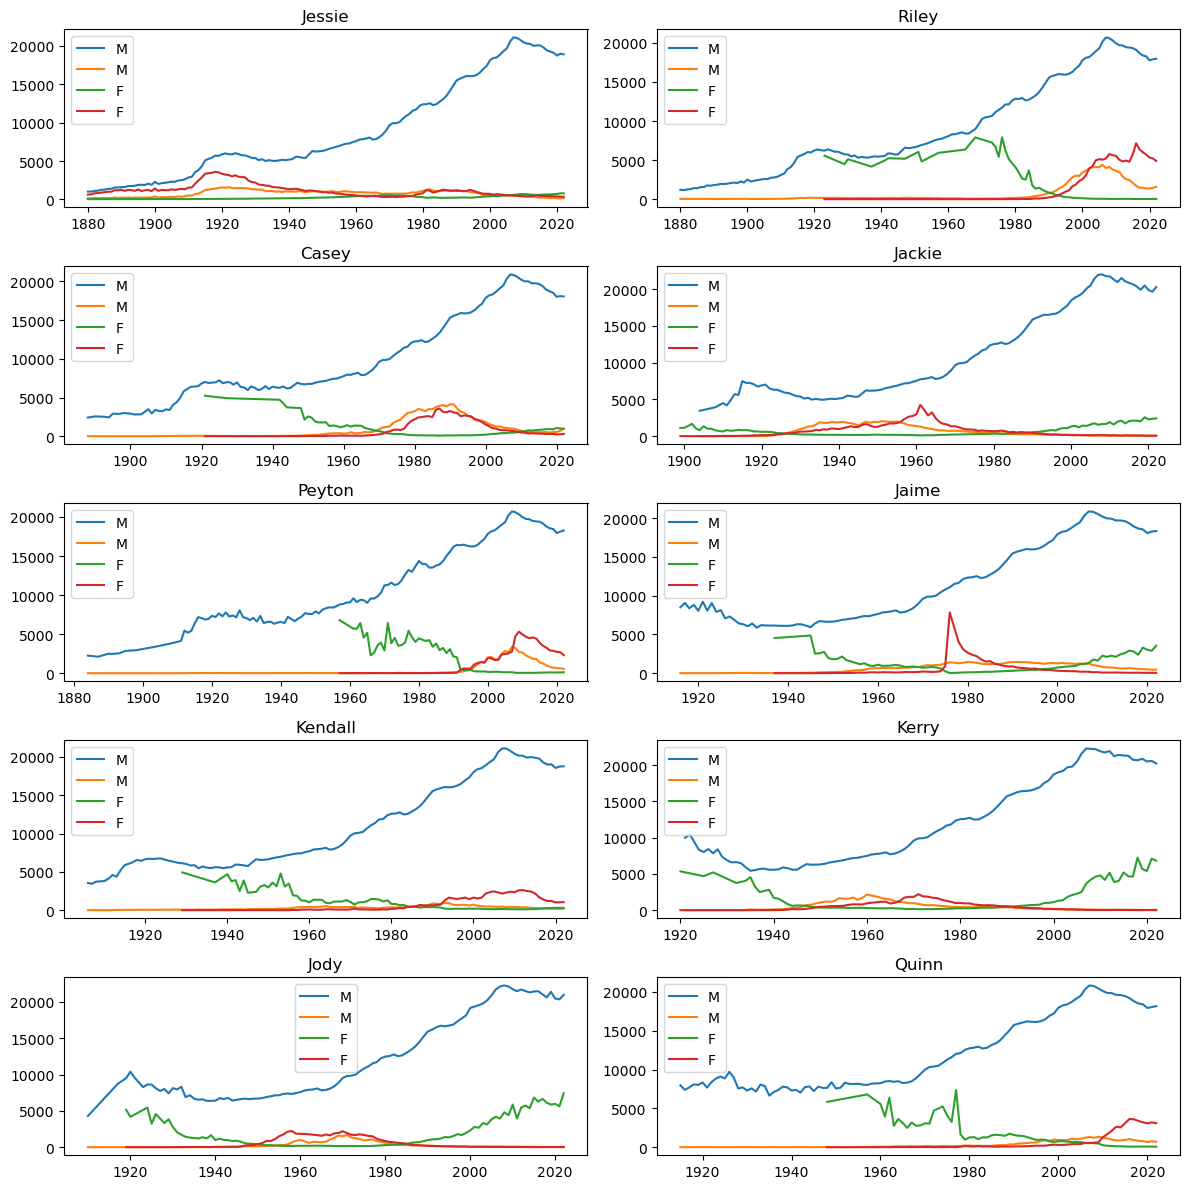

In [35]:
# Visualization 
plt.figure(figsize=(12, 12))

for i, name in enumerate(top10_unixsex_names.index):
    plt.subplot(5, 2, i+1)
    
    plt.plot(sorted_df.loc['M', name], label='M')
    plt.plot(sorted_df.loc['F', name], label='F')
    
    plt.legend()
    plt.title(name)
    
plt.tight_layout()

# Save the figure
plt.savefig("output/Top 10 unisex baby names trends.png")

### Analysis and Observation

1. Peak Period Analysis:
- Most unisex names peaked in the mid-20th century and early 21st century. This may reflect changes in societal acceptance of unisex names.

2. Gender Trends:
- Certain names like "Riley" and "Peyton" have been used more for girls in recent years, while "Jaime" and "Jackie" were more commonly used for boys in the past.
- Overall trends indicate that although these names had significant popularity during certain periods, their usage frequency typically declines after peaking.

3. Popularity Cycles:
- The popularity of unisex names shows clear cyclic patterns. After reaching a peak period, their usage frequency usually gradually decreases, which may be related to cultural and social changes.
